# Python

## High-level scientific computing

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize
from scipy import interpolate

## Interpolation

### 1D

In [10]:
x = np.linspace(-3,3,5)
noise=np.random.uniform(-0.1,0.1)
y=x**3-3*x+noise
f = interpolate.interp1d(x, y)

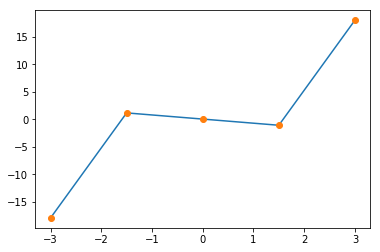

In [11]:
xn=np.linspace(-3,3,200)
yn=f(xn)
plt.plot(xn,yn,'-')
plt.plot(x,y,'o')

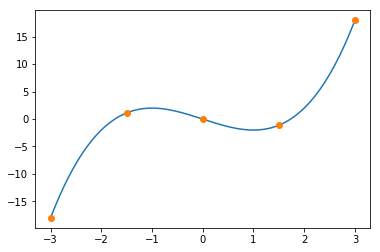

In [13]:
x = np.linspace(-3,3,5)
y=x**3-3*x
f = interpolate.interp1d(x, y,kind=3)

xn=np.linspace(-3,3,200)
yn=f(xn)
plt.plot(xn,yn,'-')
plt.plot(x,y,'o')

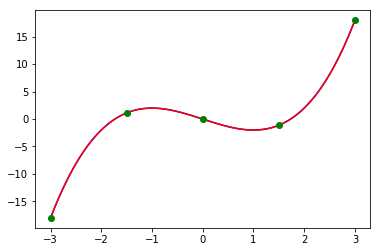

In [17]:
x = np.linspace(-3,3,5)
noise=np.random.uniform(-0.1,0.1)
y=x**3-3*x+noise
fcs = interpolate.CubicSpline(x, y)

xncs=np.linspace(-3,3,200)
yncs=fcs(xn)
plt.plot(xn,yn,'-',color='b')
plt.plot(xncs,yncs,'-',color='r')
plt.plot(x,y,'o',color='g')

In [21]:
fcs(2,3)     # The third derivative of fcs at x=2

array(6.)

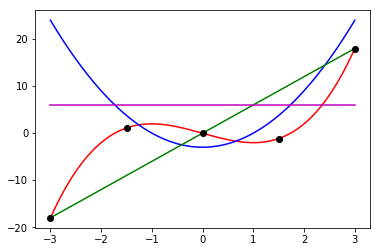

In [22]:
plt.plot(xncs,fcs(xncs),'-',color='r')
plt.plot(xncs,fcs(xncs,1),'-',color='b')
plt.plot(xncs,fcs(xncs,2),'-',color='g')
plt.plot(xncs,fcs(xncs,3),'-',color='m')
plt.plot(x,y,'o',color='k')

### 2D

In [6]:
def f(x,y):
    return 2*np.exp(-x**2-3*y**2)+2.0*np.exp(-2*(x-0.7)**2-(y-1)**2)-1.5*np.exp(-1.5*(x)**2-3*(y-0.75)**2)-np.exp(-1.5*(x-0.75)**2-3*(y+1)**2)

x = np.linspace(-2,2,5)
y = np.linspace(-2,2,5)
x,y = np.meshgrid(x,y)
z= f(x,y)

fint = interpolate.interp2d(x, y,z,kind='cubic')
def frgint(x1,y1):
    return fint(x1,y1)[0]

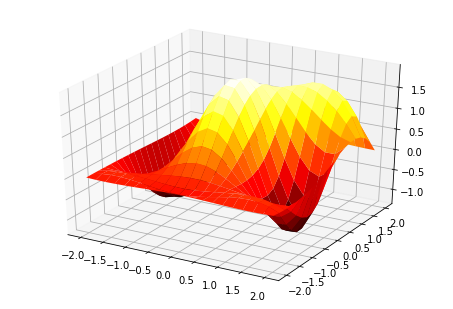

In [30]:
fig = plt.figure()
ax = Axes3D(fig)
xn=np.linspace(-2,2,20)
yn = np.linspace(-2,2,20)
zn=[]
for x in xn:
    for y in yn:
       zn.append(frgint(x,y))
zn=np.array(zn)
zn1=zn.flatten().reshape((len(xn),len(yn)))
xn,yn = np.meshgrid(xn,yn)
ax.plot_surface(xn,yn,zn1,cmap=plt.cm.hot)

## Fitting

In [28]:
xdata = np.linspace(0, 10,50)
ydata= 2.9 * np.sin(1.5*xdata) + 0.01*np.random.normal(size=50)

In [20]:
xdata

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

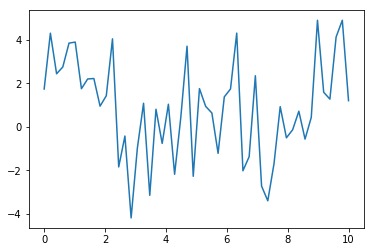

In [21]:
plt.plot(xdata,ydata)

In [22]:
def modelf1(x, a, b):
    return a*np.sin(b*x)

In [32]:
from scipy import optimize

In [29]:
params, pcov = optimize.curve_fit(modelf1, xdata, ydata, p0=[2.4,1.2],method='dogbox')
print(params)

[2.89727898 1.50013292]


In [24]:
perr = np.sqrt(np.diag(pcov))
print(perr)

[0.46604242 0.08681199]


In [25]:
yv=modelf1(xdata,params[0],params[1])

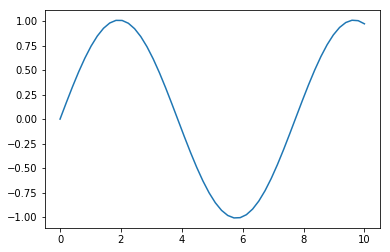

In [26]:
plt.plot(xdata,yv)

## Integration

In [9]:
from scipy.integrate import quad

In [10]:
res, err = quad(np.sin, 0, np.pi/2)

In [12]:
res

0.9999999999999999

In [11]:
err

1.1102230246251564e-14

##  Ordinary differential equation (ODE)

In [13]:
from scipy.integrate import odeint

In [16]:
eps = 0.1
omega = 2

In [17]:
def calc_deri(yvec, time, eps, omega):
    return (yvec[1], -eps * omega * yvec[1] - omega **2 * yvec[0])

In [18]:
time_vec = np.linspace(0, 10, 100)
yinit = (1, 0)
yarr = odeint(calc_deri, yinit, time_vec, args=(eps, omega))